In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Chosen Dataset

In [99]:
# Unlabeled dataset
data = pd.read_csv('CC GENERAL.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [100]:
# Data Cleaning
data = data.dropna(how = 'any')
data = data.drop('CUST_ID', axis = 1) #repetitive index column
data.shape

(8636, 17)

## Unsupervised machine learning

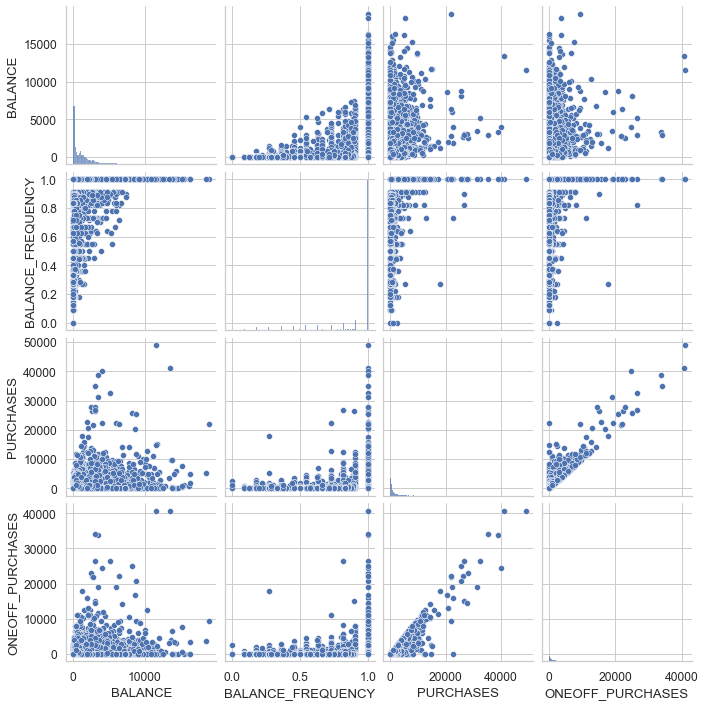

In [101]:
# Visualize the dataset with a grid of graphs based on the first 4 features
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=data, vars=data.columns[0:4])

In [102]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11)
reduced = tsne.fit_transform(data)

print(f'Reduced data shape: reduced.shape = {reduced.shape}')

C:\Users\Johnny\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Johnny\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Reduced data shape: reduced.shape = (8636, 2)


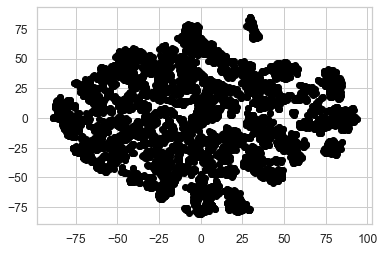

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

dots = plt.scatter(reduced[:, 0], reduced[:, 1], c='black')

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=11)  # reduce to two components
reduced_pca = pca.fit_transform(data)

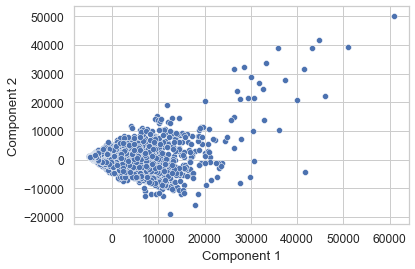

In [105]:
reduced_pca_df = pd.DataFrame(reduced_pca, columns=['Component 1', 'Component 2'])
axes = sns.scatterplot(data=reduced_pca_df,
                       x='Component 1', y='Component 2')

The PCA method is better than the TSNE method. There is a clear cluster in the lower left corner of the PCA scatterplot.

In [106]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_pca_df)

KMeans(n_clusters=3)

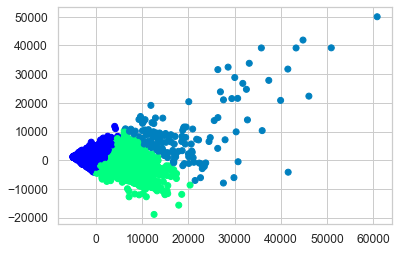

In [107]:
plt.scatter(reduced_pca_df['Component 1'], reduced_pca_df['Component 2'],  
           c = KMeans(n_clusters = 3).fit_predict(reduced_pca_df), cmap =plt.cm.winter) 
plt.show()

In [108]:
data['Label'] = kmeans.labels_
# Now we have labeled each data point
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2


## Supervised machine learning 

In [109]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # 80% training and 20% test

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [111]:
predicted = knn.predict(X=X_test)
expected = y_test

print(f'predicted = {predicted}')
print(f' expected = {expected}')

predicted = [2 2 2 ... 2 1 2]
 expected = 1715    2
2808    2
6317    2
8234    2
606     1
       ..
913     2
6075    2
8007    2
2361    1
4817    2
Name: Label, Length: 1728, dtype: int32


In [112]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 98.32%


In [113]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[  23    3    0]
 [   0  433   18]
 [   0    8 1243]]


In [114]:
from sklearn.metrics import classification_report

print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.98      0.96      0.97       451
           2       0.99      0.99      0.99      1251

    accuracy                           0.98      1728
   macro avg       0.99      0.95      0.97      1728
weighted avg       0.98      0.98      0.98      1728



## Further experiments 

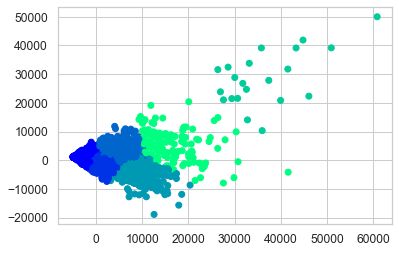

In [115]:
# what if I use 6 clusters for Kmeans? 
# Will we see a better scatterplot of clusters? Will we improve our accuracy score?

plt.scatter(reduced_pca_df['Component 1'], reduced_pca_df['Component 2'],  
           c = KMeans(n_clusters = 6).fit_predict(reduced_pca_df), cmap =plt.cm.winter) 
plt.show()

In [116]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_pca_df)
data['Label'] = kmeans.labels_

X = data.iloc[:, :-1]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=41) # 80% training and 20% test

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 97.22%


In [117]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X=X_train, y=y_train)
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 96.82%


## Report

So we have established that PCA is better at producing well-separated clusters than TSNE. Using 2 PCA components, we performed 3-means clustering and added a column to labeled data to our dataframe. Using 5-nearest neighbors classification, we were able to obtain an accuracy score of 98.32%. Surprisingly, when we tuned the parameters like changing the clusters to 6, the accuracy score dropped to 97.22%. It also dropped when I changed the n_neighbors to a higher number, like 7.